In [115]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [116]:
trocar = {
    0 : 1,
    1 : 0
}
dados['finished'] = dados.unfinished.map(trocar) 
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


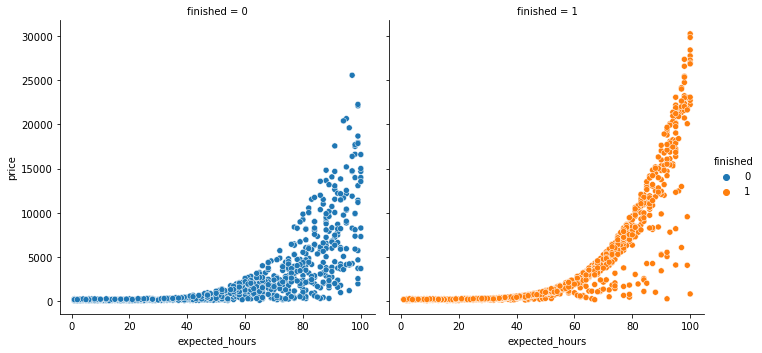

In [117]:
import seaborn as sns

#sns.scatterplot(x='expected_hours', y='price', hue='finished', data=dados)
sns.relplot(x='expected_hours', y='price', hue = 'finished', col='finished', data=dados)

In [118]:
x = dados[['expected_hours', 'price']]
y = dados['finished']

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed = 20
np.random.seed(seed)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(train_x, train_y)
prediction = modelo.predict(test_x)
accuracy = accuracy_score(test_y, prediction) * 100

c:\ProgramData\Anaconda32\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [120]:
import numpy as np

previsoes = np.ones(540) #algoritmo de baseline

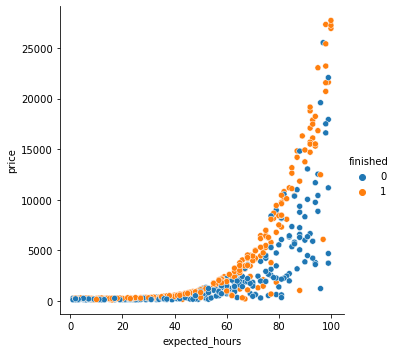

In [121]:
sns.relplot(x='expected_hours', y='price', hue = test_y, data=test_x)
#curva de decisao, algoritmo deve entender que acima da curva ele deve terminar o projeto e abaixo dela não

In [122]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

In [123]:
pixels = 100 #quantidade de pixels
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [124]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [125]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

c:\ProgramData\Anaconda32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


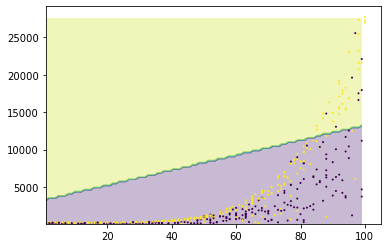

In [126]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)
#decision boundary

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

seed = 20
np.random.seed(seed)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = SVC()
modelo.fit(train_x, train_y)
prediction = modelo.predict(test_x)
accuracy = accuracy_score(test_y, prediction) * 100

c:\ProgramData\Anaconda32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


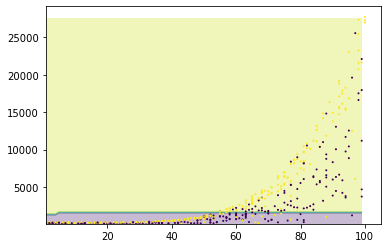

In [128]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 100 #quantidade de pixels
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)
#decision boundary

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

seed = 20
np.random.seed(seed)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

modelo = SVC()
modelo.fit(train_x, train_y)
prediction = modelo.predict(test_x)
accuracy = accuracy_score(test_y, prediction) * 100
accuracy

70.37037037037037

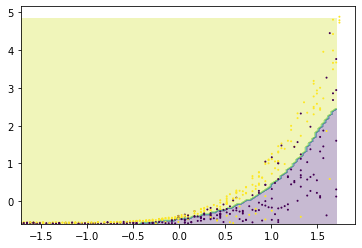

In [138]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100 #quantidade de pixels
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)
#decision boundar